<table align="center" width="100%">
    <tr>
        <td width="30%">
            <img src="https://streaming.humix.com/poster/QxsUsfdUPcOUROKq/21d2939c35ef9752c3bf050354d41d4bef1de69d760867f678be45c01918afde_KWtThF.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#7F0542" size="6">
                    <b>Advanced Hypothesis Testing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## <font color='red'>**Please note that any topics that are not covered in today's lecture will be covered in the next lecture.**</font>

## <font color='blue'>**Content**</font>

1. Recap of One-Way ANOVA
2. Two-Way ANOVA
3. KS - Test
4. A/B Testing
5. Parametric vs Non-parametric.

## <font color='blue'>Recap of One-Way ANOVA:</font>

- In One-Way ANOVA, we explored how to compare means across **more than two** groups when we had just **one categorical independent variable**.

- We used it to determine whether there were statistically significant differences between those groups.

- When we perform One-Way ANOVA, we obtain an F-statistic and a p-value.
  - The p-value tells us whether the differences between the groups are statistically significant.
  - If the p-value is small (typically less than alpha), we conclude that there are significant differences between at least two groups.

---

## <font color='blue'>Two Way ANOVA</font>

### <font color='purple'>**Motivation:** Now, why do we need Two-Way ANOVA?</font>

<font color='purple'>**Imagine you're working as a data scientist for a beverage company, and your company produces and sells soft drinks.**</font>

- You want to understand the factors that influence the sales of your drinks
- So, you decide to examine **two different factors**: the flavour of the drink and the location where it's sold.

Now, you've probably already grasped the importance of considering these two factors.
- The flavour of the drink (e.g., lemon, cola, and orange) and
- The location (e.g., North, South, East, and West) can both have an impact on sales.

This is where **Two-Way ANOVA** comes into play.

Two-way ANOVA allows us to investigate how **two independent categorical variables** interact and impact a continuous dependent variable, in this case, the sales of soft drinks.

In this example, "**Flavour**" and "**Location**" are our **independent variables**, and **"Sales"** is our **dependent variable**.
- With One-Way ANOVA, we could only investigate one of these factors at a time.
- But Two-Way ANOVA enables us to look at both factors simultaneously and assess how they interact.

<font color='purple'>**Here's how it works:**</font>

1. **Main Effects:** Two-way ANOVA assesses the main effects of each factor. In our case, it would evaluate the effect of "Flavour" and the effect of "Location" on sales independently.

2. **Interaction Effect:** It also examines the interaction between the two factors. In other words, it helps us understand whether the impact of "Flavor" on sales depends on the "Location," and vice versa.

<font color='purple'>This allows us to answer questions like:</font>

- Is there a significant difference in sales between the three flavours?
- Is there a significant difference in sales between the four locations?
- Is there an interaction effect between flavour and location on sales?

By conducting Two-Way ANOVA, we can determine if these factors have a statistically significant impact on sales.

This information can be vital for marketing strategies, product development, and resource allocation.

<font color='purple'>Let's solve the above business case with actual data.</font>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0 -O two_way_anova.csv

--2024-01-18 09:45:16--  https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
Resolving drive.google.com (drive.google.com)... 142.250.152.101, 142.250.152.138, 142.250.152.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.152.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0 [following]
--2024-01-18 09:45:16--  https://drive.usercontent.google.com/download?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.147.132, 2607:f8b0:4001:c20::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.147.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1541 (1.5K) [application/octet-stream]
Saving to: ‘two_way_anova.csv’

two_way_anova.csv   100%[===================>]   1.50K  --.-KB/s    in 0s      

2024-01-18 09:45:17 (32.1 M

In [ ]:
df=pd.read_csv('/content/two_way_anova.csv')
df.head()

,Flavour,Location,Sales
0,Orange,West,141
1,Lemon,West,178
2,Orange,West,170
3,Orange,East,76
4,Lemon,East,170


In [ ]:
df.shape

(100, 3)

In [ ]:
df['Flavour'].unique()

array(['Orange', 'Lemon', 'Cola'], dtype=object)

In [ ]:
df['Location'].unique()

array(['West', 'East', 'North', 'South'], dtype=object)

We have the data of three different flavours & four different locations and their sales.

##### <font color='green'>**STEP 1:**</font>

> **What should be the null and alternate hypothesis?**

1. <font color='purple'>Null Hypotheses for Main Effects:</font>
   - **Null Hypothesis for Flavor:** There is no significant difference in sales between the three flavors (Lemon, Cola, Orange).
   - **Null Hypothesis for Location:** There is no significant difference in sales between the four locations (North, South, East, West).

2. <font color='purple'>Alternative Hypotheses for Main Effects:</font>
   - **Alternative Hypothesis for Flavor:** There is a significant difference in sales between at least two flavours.
   - **Alternative Hypothesis for Location:** There is a significant difference in sales between at least two locations.

<br>

1. <font color='purple'>Null Hypothesis for Interaction Effect:</font>
   - **Null Hypothesis for Interaction Effect:** There is no interaction effect between the choice of flavour and the location of sale on sales. (i.e.,In other words, the impact of flavor on sales does not depend on the location, and vice versa.)

2. <font color='purple'>Alternative Hypothesis for Interaction Effect:</font>
   - **Alternative Hypothesis for Interaction Effect:** There is a significant interaction effect between the choice of flavour and the location of sale on sales. (i.e., In other words, the impact of flavour on sales depends on the location, or the impact of location on sales depends on the flavour.)

##### <font color='green'>**STEP 2:**</font>

> **What is the distribution it follows?**

- Gaussian distribution.

##### <font color='green'>**STEP 3:**</font>

##### We perform Two-way ANOVA test and calculate the P-Value

Reference: [Documentation](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html)

In [ ]:
# perform two-way ANOVA

# fit an ols model on the dataframe
# use 'fit()' to fit the linear model
# ols('dependent variable ~ C(independent variable1) * (independent variable2)', data=df).fit()
# ~ : This symbol separates the dependent variable from the independent variables and their interactions.
# C(): This indicates that the variable following it is treated as a categorical variable.
# the + sign is used to include independent variables without an interaction
# the * sign is used to include independent variables with an interaction

test = ols('Sales ~ C(Flavour) * C(Location)', data=df).fit()

# create a table for a 2-way ANOVA test
# Pass the linear model 'test'
# 'typ = 2' performs two-way ANOVA
anova_table = sm.stats.anova_lm(test, typ = 2)

# Display the results
print(anova_table)

                               sum_sq    df         F    PR(>F)
C(Flavour)                6919.558981   2.0  1.968465  0.145773
C(Location)               2059.273884   3.0  0.390546  0.760092
C(Flavour):C(Location)   11802.257765   6.0  1.119163  0.357804
Residual                154669.016331  88.0       NaN       NaN


<font color='purple'>Brief explanation of each term represents:</font>

1. <font color='orange'>**sum_sq (Sum of Squares):**</font> It measures the variation in the dependent variable that can be attributed to the effect of the independent variable or factor being considered.
  - In Two-Way ANOVA, you have a sum of squares for each factor (e.g., Flavour, Location) and the interaction between them.

2. <font color='orange'>**df (Degrees of Freedom):**</font> It represents the number of values in the final calculation of a statistic that are free to vary.
  - In ANOVA, it's associated with the factor being tested. For example, "df" for Flavour is the number of levels of Flavour minus 1.

3. <font color='orange'>**F (F-Statistic):**</font> It's a measure of the ratio of the variance between groups (explained variance) to the variance within groups (unexplained variance).
  - A high F-value indicates a significant difference between groups, while a low F-value suggests that the groups are similar.

4. <font color='orange'>**PR(>F) (p-value):**</font> This is the probability associated with the F-statistic. It indicates the likelihood that the observed differences in group means occurred by chance.
  - A low p-value (typically less than 0.05) suggests that the factor has a significant effect, while a high p-value suggests a lack of significance.

5. <font color='orange'>Residual:</font> This represents the variation in the data that is not accounted for by the factors (Flavour, Location, and their interaction).
  - It is the unexplained or leftover variability after considering the effects of the specified factors.
  - We will learn more about this in future modules.

##### <font color='green'>**STEP 4:**</font>

We defined $α = 0.05$ for confidence level 95%

The above table shows the summary of results from our Two-Way ANOVA analysis.


<font color='purple'>1. **Flavour:**</font>
   - `PR(>F)`: The p-value is 0.145773, which is greater than the typical significance level of 0.05. As a result, you do not have enough evidence to **reject the null hypothesis**, suggesting that there is no significant effect of flavor on sales.

<font color='purple'>2. **Location:**</font>
   - `PR(>F)`: The p-value is 0.760092, which is much greater than 0.05. Therefore, you do not have enough evidence to **reject the null hypothesis**, suggesting that there is no significant effect of location on sales.

<font color='purple'>3. **Flavour:Location (Interaction Effect):**</font>
   - `PR(>F)`: The p-value is 0.357804, which is greater than 0.05. This suggests that there is no significant interaction in the effect between flavour and location on sales.

Overall, the data suggests that neither the choice of flavour, the location of sale, nor their interaction significantly affect the sales of the soft drinks.

---

## <font color='blue'>KS - Test</font>

### <font color='purple'>**Motivation:**</font>

<font color='purple'>Imagine you're working as a data analyst for a pharmaceutical company, and your company is researching the effectiveness of two different medicines, Medicine M1 and Medicine M2.</font>

- You want to determine whether these two medicines have similar recovery time distributions when administered to patients.
- So, you decide to examine the distribution of recovery times for both medicines to see if there are any significant differences.

Now, you might be thinking, <font color='purple'>"Why not just use a Z-Test, like we did in other cases?"</font>
- Well, there's a fundamental difference between the KS-Test and a Z-Test.

<font color='purple'>**In a Z-Test:**</font>
- You make certain assumptions about the population distribution, such as normality, and you often need to know the population standard deviation.
- It's designed to compare sample means and is suited for situations when you have a clear understanding of the population and its parameters.

<font color='purple'>**But in the case of the KS-Test:**</font>
- You don't need to make any specific assumptions about the population distribution.
  - It's **distribution-free**, which means you can use it even when you're not sure about the underlying distribution of the data.
- The KS-Test assesses the similarity of the entire distribution, not just the means.
  - It's suitable when you want to compare the overall distribution shapes and see if they're the same or significantly different.

So, Two-Sample Z-Tests and the KS-Test serve different purposes:
- A Two-Sample Z-Test is handy when you want to compare means and make specific assumptions about the population.
- But the KS-Test is your go-to when you want to check if two datasets have the same distribution, even if you're uncertain about that distribution.

In our example with Medicine M1 and Medicine M2, the **KS-Test** will help us determine whether the recovery time distributions for these two medicines are the same or significantly different without assuming a specific population distribution. This can be crucial in the pharmaceutical industry, where patient responses can vary widely.

Let's explore another statistical test called the <font color='purple'>**Kolmogorov-Smirnov Test**</font>, often referred to as the <font color='purple'>**KS Test**</font>.

- This test is used to determine whether two sets of data follow the same distribution or not.

- To understand this better, let's break it down into simpler terms.

<font color='purple'>Imagine you have two sets of data, X and Y. You want to know whether they follow the same distribution.</font>

- But first, let's start with a basic question:
  - Suppose there is $x$ variable = $x_1,x_2....,x_n$     
  - Does this follow a Gaussian (normal) distribution?

To check this, we're going to create another set of data,

- $y$ = $y_1,y_2....,y_m$  in such a way that it has the same average (mu) as X and the same standard deviation (sigma) as X. This means that Y will have the same centre and spread as X.

Note: $n$ and $m$ in $x_n$ and $y_m$ are not to small means size of the sample x and y is not too small


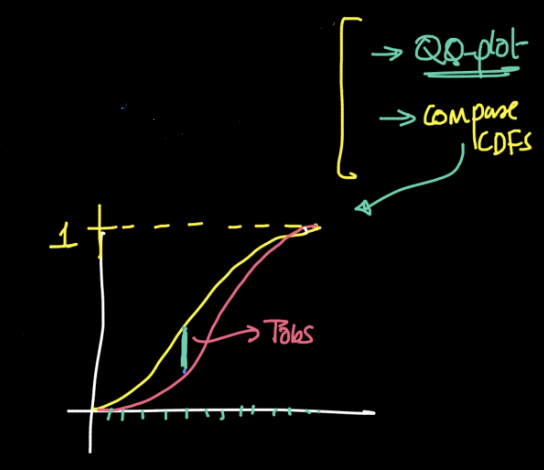

<font color='purple'>Now, we want to test a hypothesis:</font>

- Null Hypothesis ($H_0$): The distribution of X is the same as the distribution of Y.

- Alternative Hypothesis ($H_1$): The distribution of X is different from the distribution of Y.

We can use a few methods we've discussed in previous classes to compare these two distributions.

- One method is the **QQ-plot**, which helps us visualize the distributions,
- and another is to compare the <font color='purple'>**Cumulative Distribution Functions**(CDFs).</font>

But today, we're going to focus on the Kolmogorov-Smirnov Test.

Now, here's the essential part:

- The Kolmogorov-Smirnov Test calculates a test statistic, which we'll call KS-Test.

- This statistic tells us how much the CDFs of X and Y differ from each other. In simple terms, it measures the gap between the two CDFs.

  - In this case (2 sample KS test), the Kolmogorov–Smirnov statistic ($T_{ks}$) is given by.
  
  - $T_{ks}$ = $sup \ |CDF(x) - CDF(y)|$  

  - where $|CDF(x) - CDF(y)|$ is ab absolute value of gap between 2 CDFs.   

    $sup$ is supremum function.

<br>

**Under the null hypothesis**, when X and Y follow the same distribution, the test statistic ($T_{ks}$) tends towards zero. This is because their CDFs overlap with each other.


In contrast, **under the alternative hypothesis**, when X and Y have different distributions, the test statistic ($T_{ks}$) is a very large positive value. This means there's a significant difference between the two CDFs, indicating that the distributions are not the same.

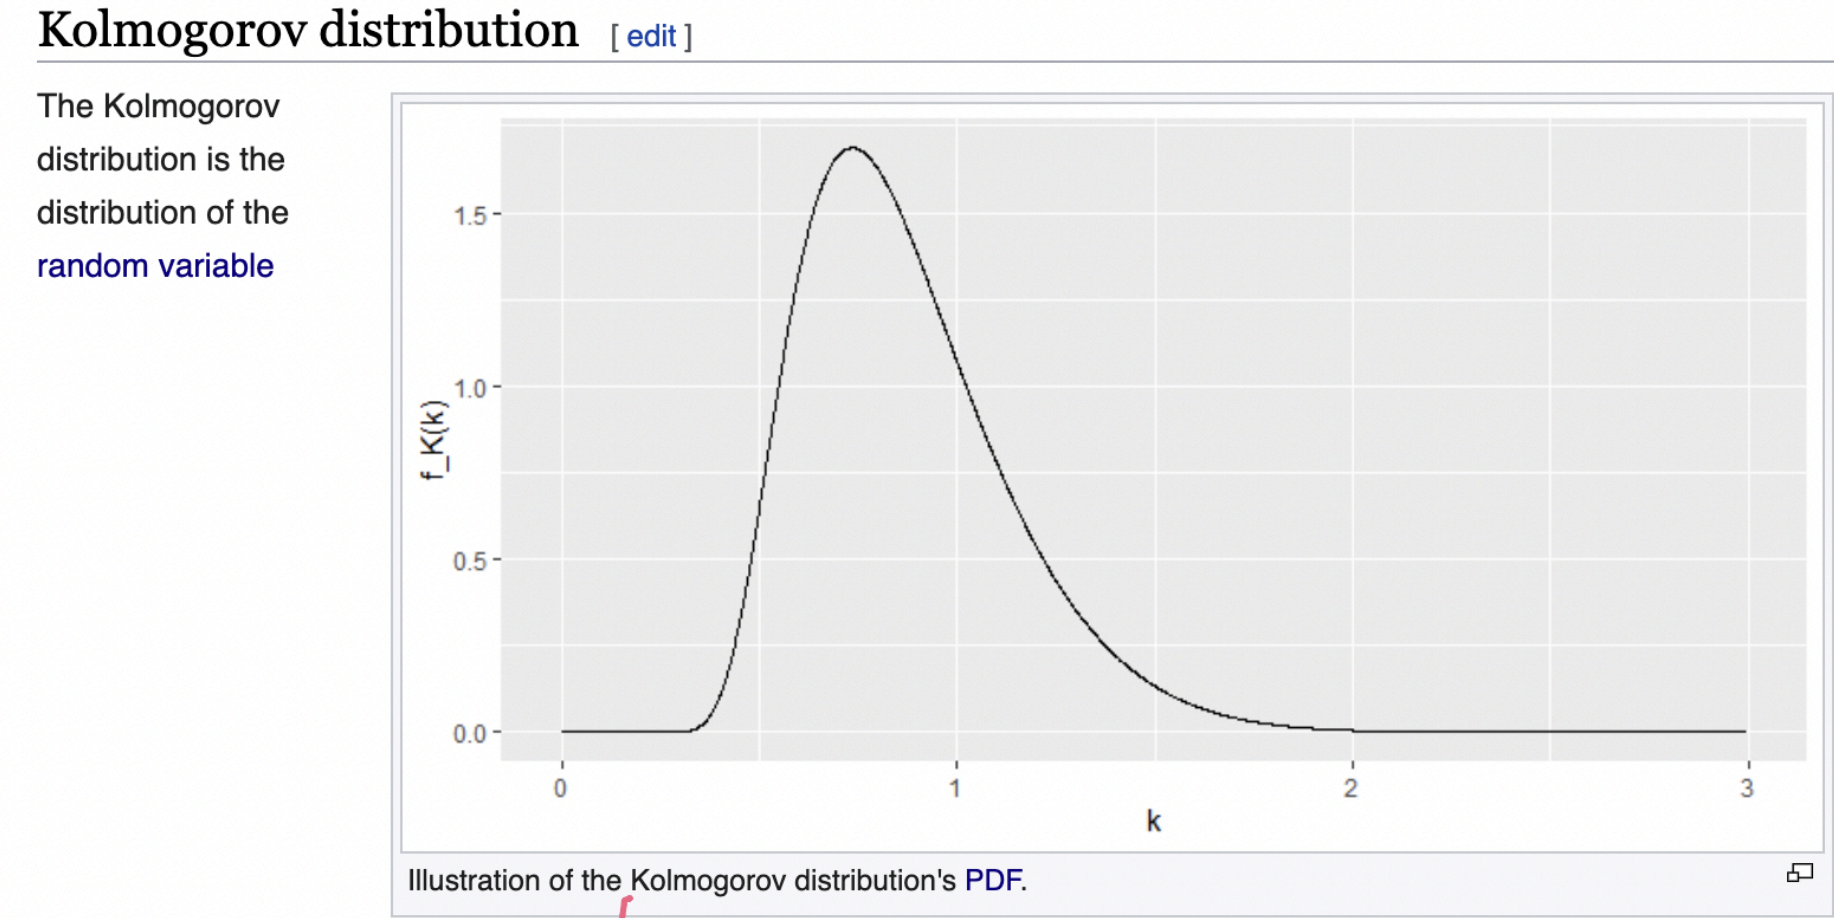

<font color='purple'>So, what distribution does this test statistic follow under the null hypothesis?</font>

- It follows the **Kolmogorov distribution**. And if you look at the Kolmogorov distribution, you'll notice it has no negative values.

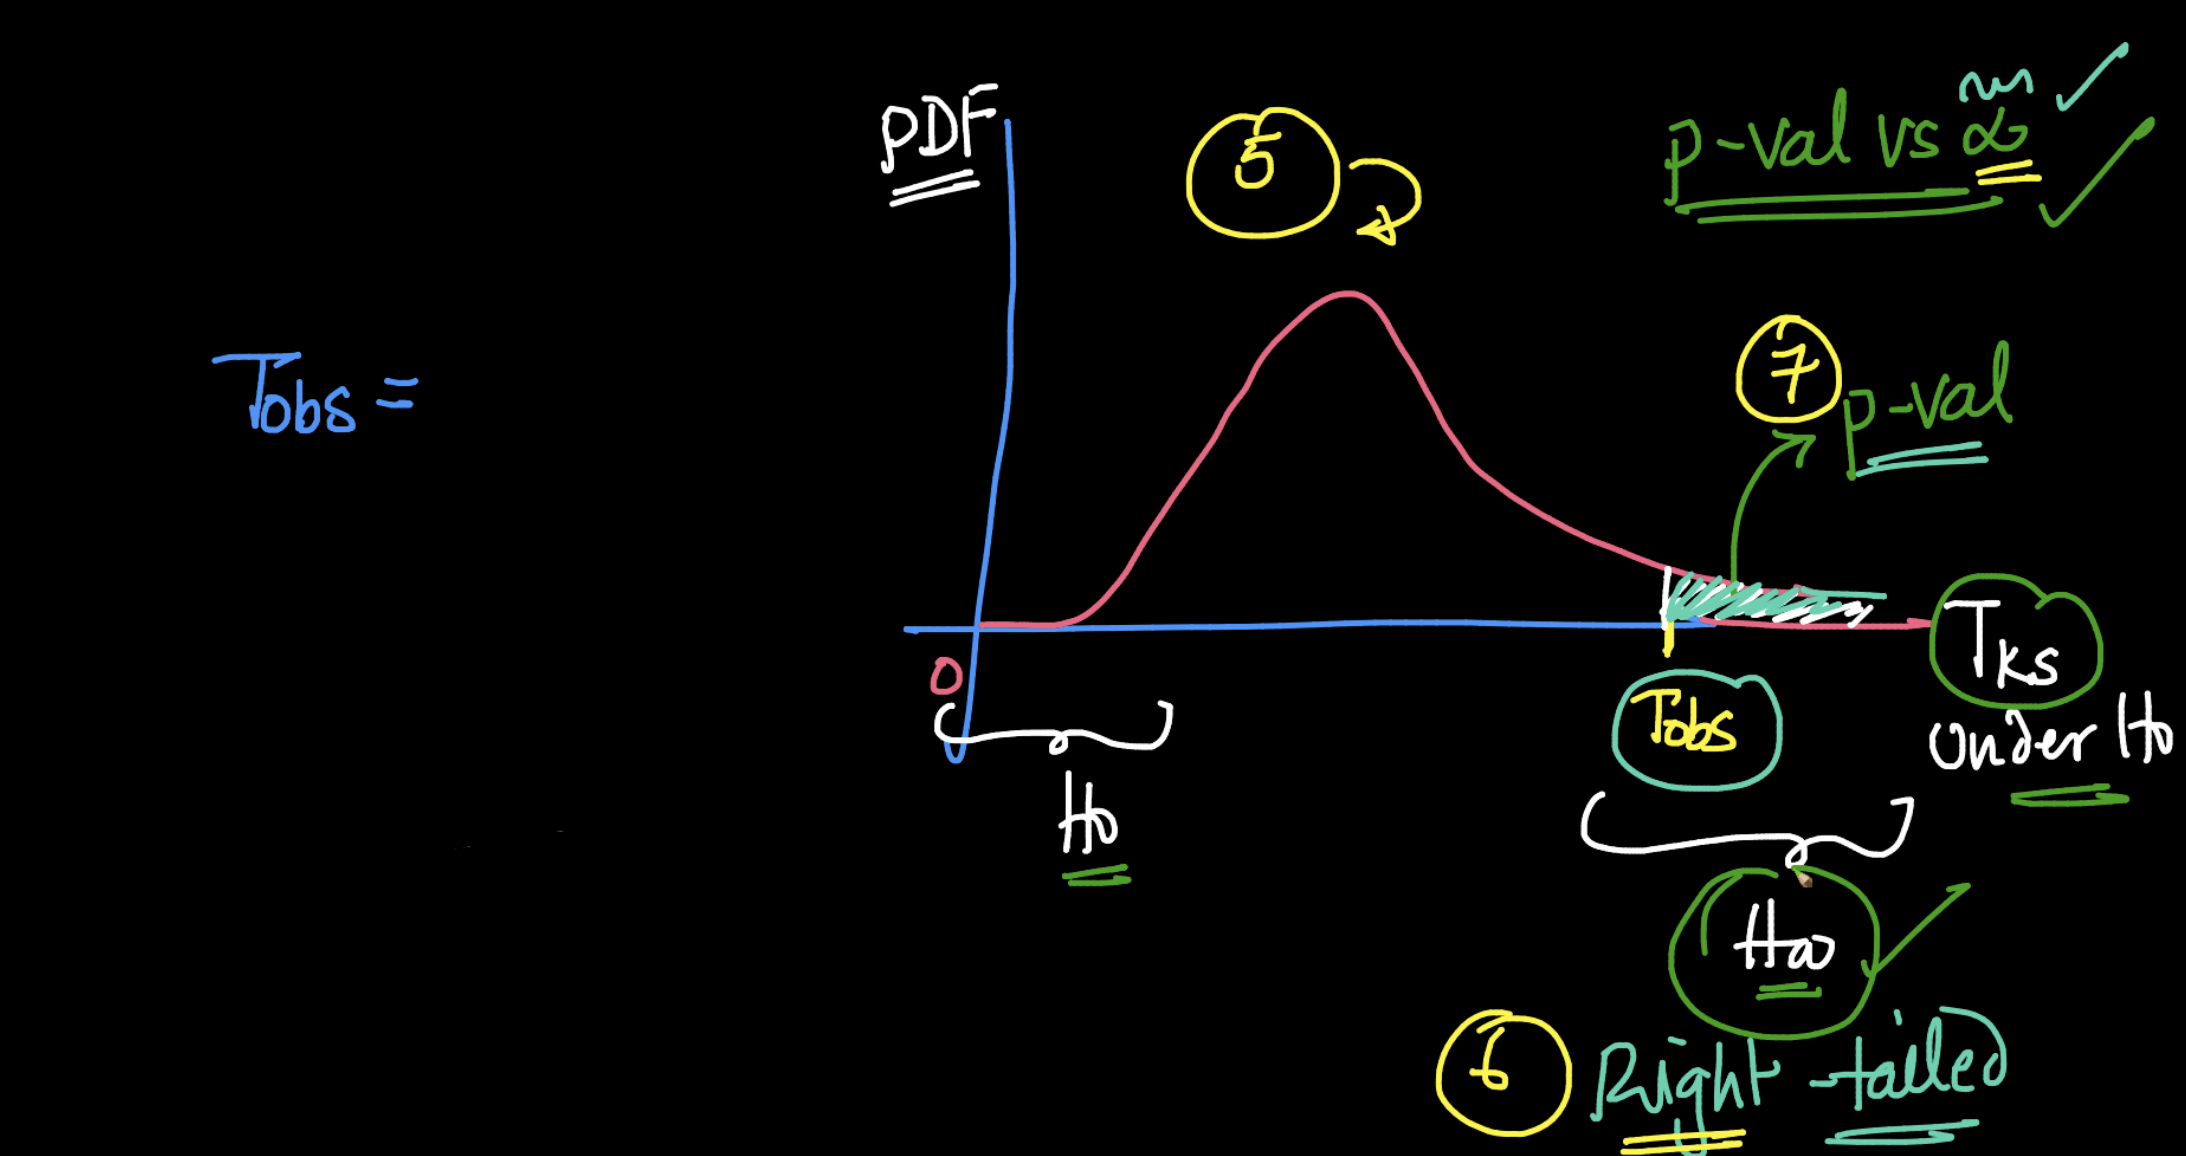

- The Kolmogorov-Smirnov Test is a **Right-tailed test**, which means it looks for significant differences on the right side of the distribution.

<font color='purple'>Now, let's relate this to a real-world example.</font>

Let's take the same example of the recovery times of two different medicines, just like we discussed in our Two-Sample Z-Test lecture.

- We want to know if both medicines have similar recovery time distributions.

- This is where the Kolmogorov-Smirnov Test can help us determine if the recovery times for both medicines are drawn from the same distribution or not.

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

##### <font color='green'>**STEP 1:**</font>

> **What should be the null and alternate hypothesis?**

- Null Hypothesis ($H_0$): The distribution of sample 1 is the same as the distribution of sample 2.

- Alternative Hypothesis ($H_1$): The distribution of sample 1 is different from the distribution of sample 2.

##### <font color='green'>**STEP 2:**</font>

> **What is the distribution it follows?**

- Kolmogorov distribution .

##### <font color='green'>**STEP 3:**</font>

Let's take data on recovery times.


In [ ]:
# recovery times of patients who took medicine-1
r1 = [8.82420842, 7.47774471, 7.55712098, 7.98131439, 6.82771606,
       7.48566433, 9.15385732, 5.84040502, 8.26124313, 8.4728876 ,
       6.82582186, 7.00490974, 8.43423058, 6.72099932, 6.97495982,
       5.93748053, 5.40707847, 6.16385557, 6.71421056, 4.42396183,
       6.87285228, 8.00313581, 6.69035041, 7.83622942, 8.70984957,
       5.56284584, 9.08093437, 4.98165193, 7.67769408, 6.04738478,
       7.64921582, 7.31051639, 6.74463303, 7.27356973, 8.16787232,
       6.90990965, 7.06439167, 6.62921957, 6.08283539, 6.2458137 ,
       8.65173634, 5.76080646, 6.20573219, 8.91561004, 6.22560201,
       5.67542104, 6.97412435, 8.31354697, 8.14172701, 8.26099345,
       7.87612791, 6.24835109, 9.95324783, 6.59504627, 6.17365145,
       6.05676895, 7.23030223, 7.71311809, 7.37163804, 5.69798738,
       5.71056902, 7.94556876, 7.47234105, 6.85346234, 4.77892053,
       6.92631063, 6.10681151, 7.06277198, 7.18023164, 7.78285327,
       7.85500885, 6.54349161, 8.25949958, 6.44289198, 7.16705977,
       6.03517015, 7.61274786, 7.032845  , 6.78161745, 7.07917968,
       6.21549342, 5.34267439, 6.73039933, 7.70562561, 8.15117049,
       6.72564324, 6.68220904, 8.50359274, 7.52912703, 7.34572493,
       5.95734283, 6.58259396, 6.49394335, 8.68069592, 8.60547125,
       6.8905056 , 7.72575925, 6.84801609, 7.96999724, 7.10420915]

In [ ]:
# recovery times of patietnts who took medicine-2
r2 = [ 9.56597358,  7.49291458,  8.73841824,  7.63523452,  4.12559277,
        7.3679259 ,  9.87873565,  6.14516559,  8.19923821,  7.30169992,
       10.24606417,  6.83814477,  7.01611267,  6.15716049,  8.29590714,
       12.3333305 ,  8.22144016,  6.06830071,  3.75820649,  6.69220157,
       10.08721618,  9.70580422,  7.31050006, 11.40145721,  5.64818498,
        7.38914449,  8.43740074,  6.3451435 ,  7.05694361,  8.1997151 ,
        9.03059061,  7.76904679,  6.92375578,  5.78318543,  8.99027781,
        7.56186529,  5.27095372,  8.32896688, 11.52935757,  7.08119961,
        9.48825066,  9.14072759,  7.30357663,  8.62183754, 10.40999814,
        8.70096763,  7.04645384,  6.378799  , 10.5098363 ,  7.36078888,
        7.33403615,  8.07396248,  6.18309499,  7.24668404,  9.03430611,
        8.99016584,  6.78606416,  8.436418  ,  6.85877947, 10.10405772,
        6.74943076,  7.57812376,  7.12920671,  9.38065269,  9.57139966,
        6.4484012 ,  6.93877043,  9.22141667,  8.34815638,  7.73980671,
        7.17840767,  9.27913457,  6.49963224,  9.92287292,  7.63978639,
        9.53931977,  9.02602273,  6.79374185,  8.59715131,  8.37747338,
        8.78161815,  6.78716383,  8.28473394,  8.20283798, 12.50518811,
       10.19772574,  8.93758457,  8.9540311 ,  8.28927558,  6.28935098,
        7.69447559,  9.66777701, 10.33898342,  8.71199578,  5.12781581,
        9.70954569,  9.13685031,  7.28989718,  8.0868909 ,  7.42937556,
        7.31356749,  9.92345816,  8.60211814,  9.33228465,  8.14132658,
        6.17871495, 10.28358242,  7.31898597,  7.95085527,  6.20331719,
        9.19119762,  6.98600628,  7.05314883, 10.57921482,  6.83637574,
        7.86199283,  8.23350975,  5.87625665,  7.78945364,  8.83612492]

In [ ]:
d1 = np.array(r1)
d2 = np.array(r2)
n1 = len(d1)
n2 = len(d2)
n1, n2

(100, 120)

##### <font color='green'>**STEP 4:**</font>

##### We perform KS-test and calculate the P-Value

In [ ]:
statistic, p_value =  stats.kstest(d1, d2)
print("KS Statistic:", statistic)
print("P-value:", p_value)

KS Statistic: 0.3233333333333333
P-value: 1.516338798228849e-05


##### <font color='green'>**STEP 5:**</font>

We defined $α = 0.01$ for confidence level 99%

In [ ]:
# Check if the p-value is greater than 0.01
if p_value > 0.01:
    print("The p-value is greater than 0.01,two samples have the same distribution.")
else:
    print("The p-value is less than or equal to 0.01, two samples have different distributions.")

The p-value is less than or equal to 0.01, two samples have different distributions.


##### <font color='green'>**STEP 6:**</font>

Plotting the data two visualise the distributions

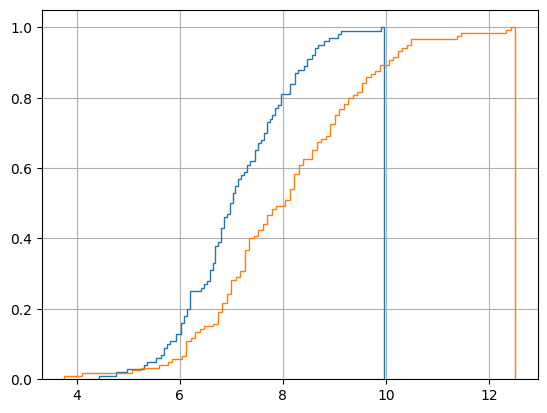

In [ ]:
plt.grid()
a = plt.hist(d1, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(d2, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

From the above graphs, we can see that there is a huge gap between the two distributions.

##### <font color='purple'>Let's take another set of data for the same use case.</font>

##### <font color='green'>**STEP 1:**</font>

> **What should be the null and alternate hypothesis?**

- Null Hypothesis ($H_0$): The distribution of sample 1 is the same as the distribution of sample 2.

- Alternative Hypothesis ($H_1$): The distribution of sample 1 is different from the distribution of sample 2.

##### <font color='green'>**STEP 2:**</font>

> **What is the distribution it follows?**

- Kolmogorov distribution .

##### <font color='green'>**STEP 3:**</font>

Let's take data on recovery times.


In [ ]:
data1 = [ 4.96714153,  1.38264301,  6.47688538, 15.23029856,  2.34153375,
        2.34136957, 15.79212816,  7.67434729,  4.69474386,  5.42560044,
        4.63417693,  4.65729754,  2.41962272, 19.13280245, 17.24917833,
        5.62287529, 10.1283112 ,  3.14247333,  9.08024076, 14.12303701,
       14.65648769,  2.257763  ,  0.67528205, 14.24748186,  5.44382725,
        1.1092259 , 11.50993577,  3.75698018,  6.0063869 ,  2.9169375 ,
        6.01706612, 18.52278185,  0.13497225, 10.57710929,  8.22544912,
       12.2084365 ,  2.08863595, 19.59670124, 13.28186049,  1.96861236,
        7.3846658 ,  1.71368281,  1.15648282,  3.01103696, 14.7852199 ,
        7.19844208,  4.60638771, 10.57122226,  3.4361829 , 17.63040155,
        3.24083969,  3.8508228 ,  6.76922   ,  6.11676289, 10.30999522,
        9.31280119,  8.39217523,  3.09212376,  3.31263431,  9.75545127,
        4.79174238,  1.85658977, 11.06334974, 11.96206624,  8.12525822,
       13.56240029,  0.72010122, 10.03532898,  3.61636025,  6.45119755,
        3.61395606, 15.38036566,  0.35826039, 15.64643656, 26.19745104,
        8.21902504,  0.87047068,  2.9900735 ,  0.91760777, 19.87568915,
        2.19671888,  3.57112572, 14.77894045,  5.18270218,  8.08493603,
        5.01757044,  9.15402118,  3.2875111 ,  5.29760204,  5.13267433,
        0.97077549,  9.68644991,  7.02053094,  3.27662147,  3.92108153,
       14.63514948,  2.96120277,  2.61055272,  0.05113457,  2.34587133]

In [ ]:
data2 = [14.15370742,  4.20645323,  3.42714517,  8.02277269,  1.61285712,
        4.04050857, 18.86185901,  1.74577813,  2.57550391,  0.74445916,
       19.18771215,  0.26513875,  0.6023021 , 24.63242112,  1.92360965,
        3.01547342,  0.3471177 , 11.68678038, 11.42822815,  7.51933033,
        7.91031947,  9.09387455, 14.02794311, 14.01851063,  5.86857094,
       21.90455626,  9.90536325,  5.6629773 ,  0.99651365,  5.03475654,
       15.50663431,  0.68562975, 10.62303714,  4.73592431,  9.19424234,
       15.49934405,  7.83253292,  3.22061516,  8.13517217, 12.30864316,
        2.27459935, 13.07142754, 16.07483235,  1.84633859,  2.59882794,
        7.81822872, 12.36950711, 13.20456613,  5.21941566,  2.96984673,
        2.5049285 ,  3.46448209,  6.80024722,  2.32253697,  2.93072473,
        7.14351418, 18.65774511,  4.73832921, 11.91303497,  6.56553609,
        9.7468167 ,  7.87084604, 11.58595579,  8.20682318,  9.63376129,
        4.12780927,  8.2206016 , 18.96792983,  2.45388116,  7.53736164,
        8.8951443 ,  8.15810285,  0.77101709,  3.41151975,  2.76690799,
        8.27183249,  0.13001892, 14.53534077,  2.64656833, 27.20169167,
        6.25667348,  8.57157556, 10.70892498,  4.82472415,  2.23462785,
        7.14000494,  4.73237625,  0.72828913,  8.46793718, 15.14847225,
        4.46514952,  8.56398794,  2.14093744, 12.45738779,  1.73180926,
        3.8531738 ,  8.83857436,  1.53725106,  0.58208718, 11.42970298,
        3.5778736 ,  5.60784526, 10.83051243, 10.53802052, 13.77669368,
        9.3782504 ,  5.15035267,  5.13785951,  5.15047686, 38.52731491,
        5.70890511, 11.3556564 ,  9.54001763,  6.51391251,  3.15269245,
        7.5896922 ,  7.72825215,  2.36818607,  4.85363548,  0.81874139]

In [ ]:
data1 = np.array(data1)
data2 = np.array(data2)
n1 = len(data1)
n2 = len(data2)
n1, n2

(100, 120)

##### <font color='green'>**STEP 4:**</font>

##### We perform KS-test and calculate the P-Value

In [ ]:
statistic, p_value =  stats.kstest(data1, data2)
print("KS Statistic:", statistic)
print("P-value:", p_value)

KS Statistic: 0.095
P-value: 0.671374753605883


##### <font color='green'>**STEP 5:**</font>

We defined $α = 0.01$ for confidence level 99%

In [ ]:
# Check if the p-value is greater than 0.01
if p_value > 0.01:
    print("The p-value is greater than 0.01,two samples have the same distribution.")
else:
    print("The p-value is less than or equal to 0.01, two samples have different distributions.")

The p-value is greater than 0.01,two samples have the same distribution.


##### <font color='green'>**STEP 6:**</font>

Plotting the data two visualise the distributions

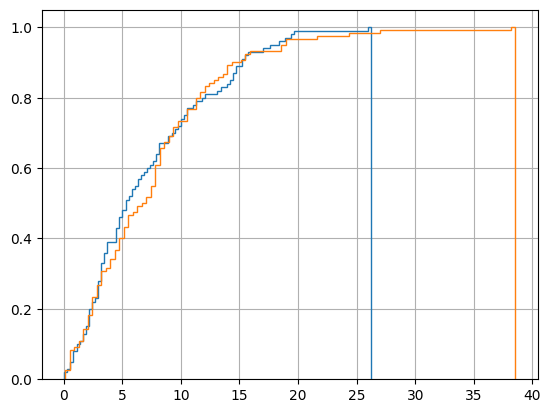

In [ ]:
plt.grid()
a = plt.hist(data1, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(data2, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

From the above graphs, we can see that there is no huge gap between the two distributions. They almost overlap.

---

## <font color='blue'>A/B Testing</font>

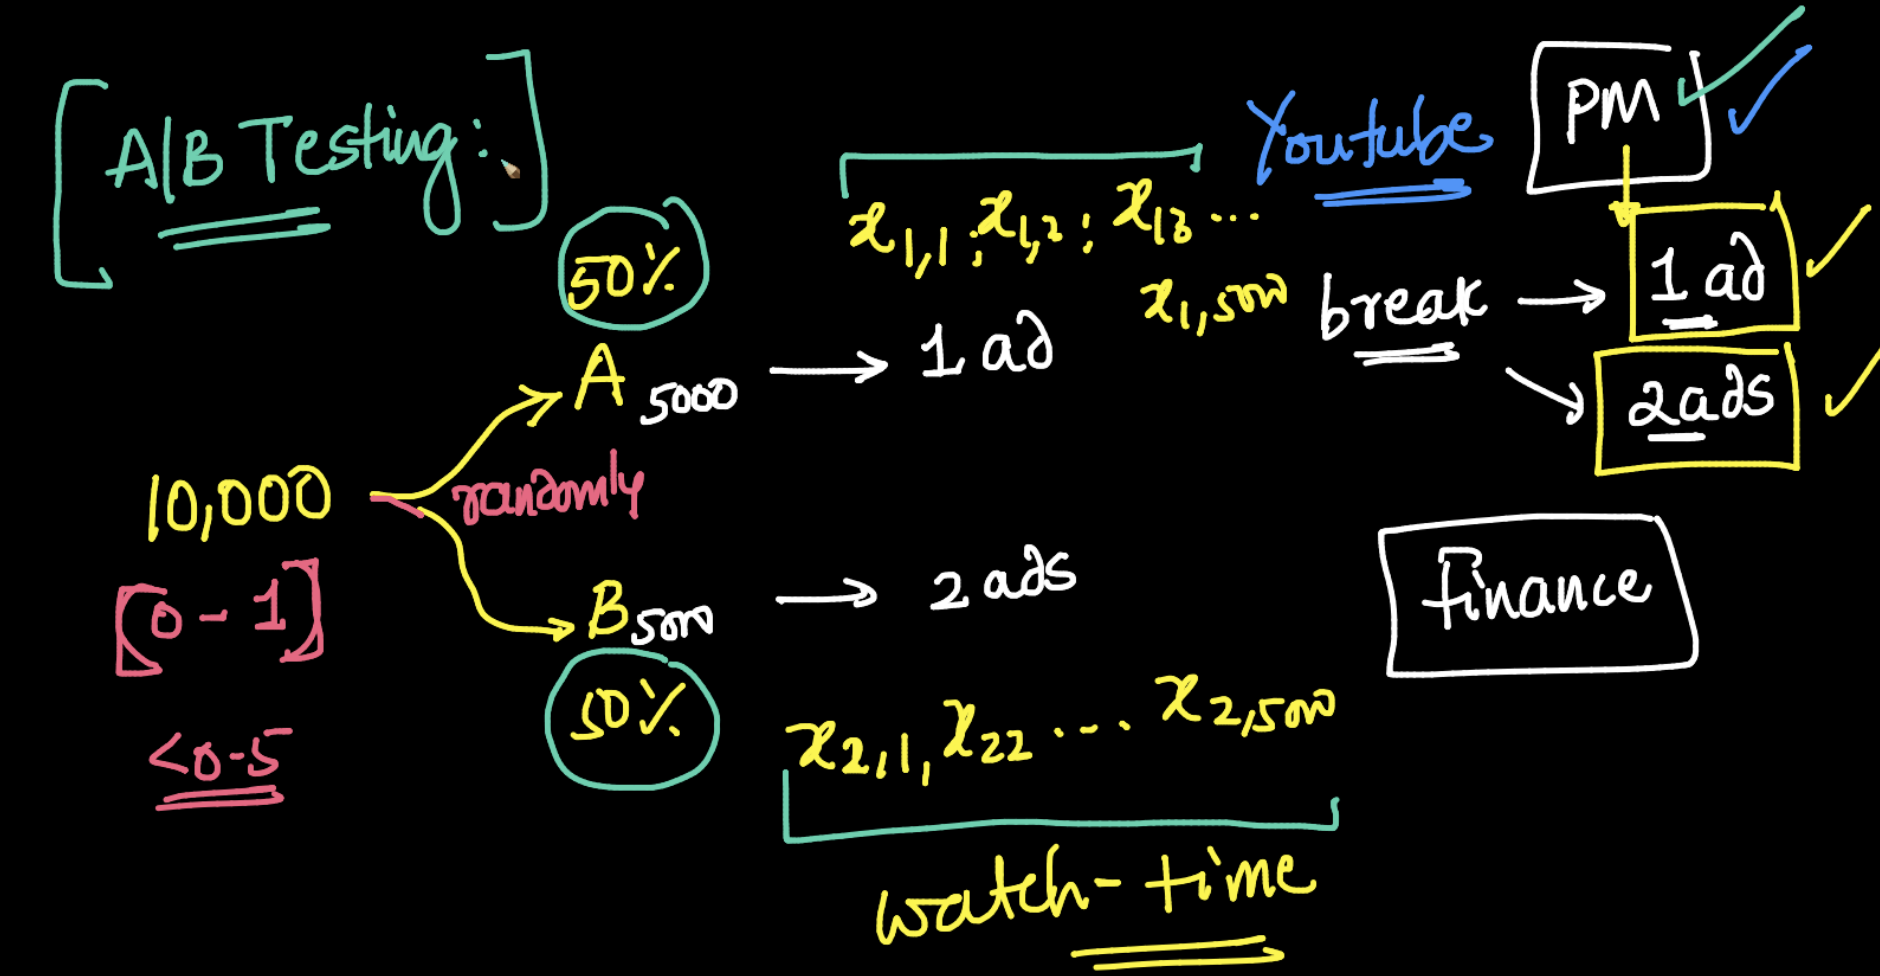

<font color='purple'>Let's say you are a data scientist at YouTube and you may want to analyze user watch time based on the number of ads in the ad break.</font>

- Should YouTube just roll out this 2 ads per ad break feature to all its users, thinking it will generate more revenue?

- Or should it just stick to 1 ad per ad break thinking the watch time of users will drop?

  - Well, we obviously can't rely just on gut feeling.

We have to test the feature on some people before we roll it out to the masses
- Whenever we want to test the consequences of a new feature
- We usually perform tests on two groups

<br>

<font color='purple'>1. Treatment Group</font>
  - To which we introduce the new feature
  - Treat them with a new feature

<font color='purple'>2. Control Group</font>
  - To which we do NOT introduce the new feature
  - No new treatment

Everything else between the Treatment and Control groups remains SAME like the Day and Time of the experiment ... etc etc
- Just the new feature is introduced to the Treatment Group and NOT to the Control Group

In general, it's called Experimentation

In the "software world", we call it <font color='purple'>**"A/B Testing"**</font>

- Group A is our Treatment Group - to which we introduce the new feature
- Group B is our Control Group - to which we DON'T introduce the new feature

Now, Let's see this with an actual example

Let's say we pick some YouTube users

- We divide the users into 2 groups **randomly** - A and B

- We show **2 ads** per ad break to **Group A** --> **Treatment Group**

- We show just **1 ad** per ad break to **Group B** --> **Control Group**

<font color='purple'>We collect data about the Mean Watch Time per day of every user in the two groups</font>

#### The question that we will answer here is:

<font color='purple'>Whether YouTube should roll out the new feature of 2 ads per ad break?
Or should it just stick to showing 1 ad per ad break?</font>

<font color='purple'>What are our Null and Alternate Hypotheses?</font>

- Null Hypothesis ($H_0$): Mean Watch Time of Users given 2 ads = Mean Watch Time of Users given 1 ad per ad break

- Alternative Hypothesis ($H_1$): Mean Watch Time of Users given 2 ads <> Mean Watch Time of Users given 1 ad per ad break

In [ ]:
import seaborn as sns
from scipy import stats

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1 -O ab_test_data.csv

--2024-01-18 09:46:42--  https://drive.google.com/uc?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1
Resolving drive.google.com (drive.google.com)... 142.250.128.138, 142.250.128.113, 142.250.128.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.128.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1 [following]
--2024-01-18 09:46:42--  https://drive.usercontent.google.com/download?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.147.132, 2607:f8b0:4001:c20::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.147.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 883665 (863K) [application/octet-stream]
Saving to: ‘ab_test_data.csv’

ab_test_data.csv    100%[===================>] 862.95K  --.-KB/s    in 0.01s   

2024-01-18 09:46:43 (78.0 

In [ ]:
ab_test_data = pd.read_csv("/content/ab_test_data.csv")

<font color='purple'>Let's check the data</font>

In [ ]:
ab_test_data.head(10)

,date,customer_id,premium,watch_time_hrs,customer_segmnt
0,2018-09-11,402,0,7.173618,control
1,2018-02-28,227,0,0.836170,control
2,2018-10-18,812,1,4.402078,treatment
3,2018-05-22,43,0,3.982454,control
4,2018-07-18,307,0,7.513302,control
5,2018-09-10,238,0,1.456961,control
6,2018-02-21,691,1,3.800375,treatment
7,2018-04-27,199,0,4.574446,control
8,2018-05-28,105,0,3.425942,control
9,2018-09-24,604,0,3.959896,treatment


In [ ]:
sum((ab_test_data["premium"] == 0) & (ab_test_data["customer_segmnt"] == "control"))

8459

In [ ]:
sum((ab_test_data["premium"] == 1) & (ab_test_data["customer_segmnt"] == "treatment"))

2012

In [ ]:
sum((ab_test_data["premium"] == 1) & (ab_test_data["customer_segmnt"] == "control"))

1514

In [ ]:
sum((ab_test_data["premium"] == 0) & (ab_test_data["customer_segmnt"] == "treatment"))

7975

In [ ]:
ab_test_data.shape

(19960, 5)

As we can see, our A/B Test Data has:

- Date on which observation was taken
- Customer ID for each user
- premium - It tells whether a customer has a premium subscription (ad-free) to YouTube or NOT.
  - 0 means the customer has NOT purchased a premium subscription
  - 1 means the customer has purchased a premium subscription
  - We will not use this attribute for our Hypothesis Testing today
- **Watch time** of each user in **hours**

- Whether the user was in **Treatment Group or Control Group**

Keep in mind that:

- Users belonging to the **Treatment Group** are shown **2 ads** per ad break
- Users in the **Control Group** are shown **1 ad** per ad break
- We have data of total 19,960 users

Let's check how many users we have in each group

> <font color='purple'>**Question:** Can anyone tell us how can we check no. of users in each of the Treatment and Control Groups?</font>

In [ ]:
ab_test_data['customer_segmnt'].value_counts()

treatment    9987
control      9973
Name: customer_segmnt, dtype: int64

As you can see:

- We have the 9987 users in the Treatment Group
- We have the 9973 users in Control Group


<font color='purple'>Let's Explore the data further. Let's visualize the distribution of `watch_time_hrs` now</font>

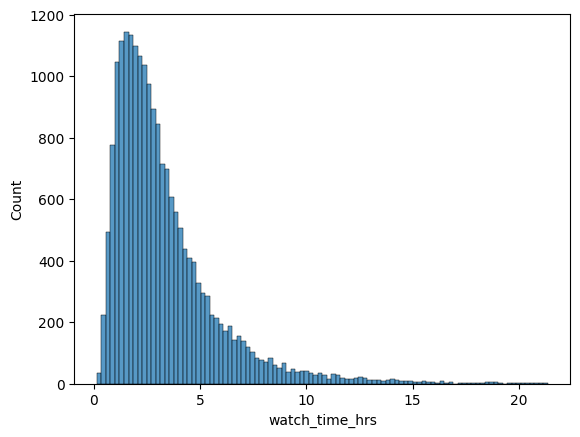

In [ ]:
sns.histplot(ab_test_data['watch_time_hrs'], bins=100)
plt.show()

<font color='purple'>Does it look like a Normal Distribution?</font>

- No, the data is right-skewed.
- We can perform Log-normal or Box-cox transformations to make the data normal. But, it's not required now.



<font color='purple'>Doing a Comparison of Means</font>

- We are doing a Comparison of Means Hypothesis Test here
Now, Let's find the mean watch time for each group (Treatment and Control)

In [ ]:
ab_test_data.groupby("customer_segmnt")["watch_time_hrs"].mean()

customer_segmnt
control      3.609960
treatment    3.054294
Name: watch_time_hrs, dtype: float64

As you can notice:

- The mean watch time for the Control Group is 3.6 hrs
- The mean watch time for the Treatment Group is 3.05 hrs

<font color='purple'>Mean_Watch_Time (Treatment) < Mean_Watch_Time (Group)</font>

- People in Group A who got pushed 2 ads per ad break are spending less time on average than People in Group B who watched 1 ad per ad break

> Can we say that pushing 2 ads per ad break is going to reduce the time spent by users on YouTube?

- No
- We can't just decide by looking at means

<font color='purple'>Where are the Confidence and the p-value we discussed earlier?</font>
- We need Confidence - Need to compute it
- We can't stop YouTube from pushing 2 ads per ad break just because means are different
- There will be a loss in revenue from ads
- We need to calculate the significance of this difference as well

<font color='purple'>Is the difference in the two means (3.6 and 3.05) even Statistically Significant?</font>

- Does pushing 2 ads make any significant difference?
- This is where the t-test comes in

<font color='purple'>Let's perform a t-test on the two means and compute confidence or p-value.</font>

- First, we'll separate out the two groups

In [ ]:
ab_test_control_data = ab_test_data[ab_test_data["customer_segmnt"] == "control"]
ab_test_treatment_data = ab_test_data[ab_test_data["customer_segmnt"] == "treatment"]

In [ ]:
ab_test_control_data.shape[0]

9973

In [ ]:
ab_test_treatment_data.shape[0]

9987

Now, Let's check the difference in the means of two groups

In [ ]:
ab_test_control_data["watch_time_hrs"].mean() - ab_test_treatment_data["watch_time_hrs"].mean()

0.555666548844524

There's a difference of 0.55 hours between the mean watch times of the Control and Treatment Groups

Is this difference Statistically Significant enough for us to discard the idea of 2 ads per ad break?

- We'll conduct the independent t-test to get confidence in our result.

In [ ]:
statistic, p_value = stats.ttest_ind(ab_test_control_data["watch_time_hrs"], ab_test_treatment_data["watch_time_hrs"])

# The two groups are independent
# So, we'll use the method for independent t-test

print("Test Statistic:", statistic)
print("P-value:", p_value)

Test Statistic: 15.96034913022092
P-value: 5.438408586231319e-57


<font color='purple'>**Question:** Check the p-value and tell if can we Reject the Null Hypothesis and go with the Alternate Hypothesis.</font>

In other words:

> **Question:** Are the Mean Watch Times Statistically Significantly Different??

Our p-value is way less than

- p-value < 0.05

- This means we have enough evidence to reject our Null Hypothesis. We can say with a confidence level of 95%
- There is a significant drop in watch time when users are shown 2 ads per ad break
- There is a Statistically Significant Difference b/w Mean Watch Times of Treatment Group and Control Group
- So, our recommendation is that YouTube should NOT roll out the feature of 2 ads per ad break :)

Also note:

- alternative argument allows us to specify whether to conduct a one-sided or two-sided t-test
- alternative argument defines the alternative hypothesis
- ttest_ind() by default does two-sided t-test
- Default value of alternative = 'two-sided'

We can change it to conduct a one-sided t-test by changing the value of the alternative agrument
  - 'less': one-sided
  - 'greater': one-sided

Let's see that in the code now

In [ ]:
statistic, p_value = stats.ttest_ind(ab_test_control_data["watch_time_hrs"], ab_test_treatment_data["watch_time_hrs"], alternative='greater')

# The two groups are independent
# So, we'll use the method for independent t-test

print("Test Statistic:", statistic)
print("P-value:", p_value)

Test Statistic: 15.96034913022092
P-value: 2.719204293115659e-57


- p-value has decreased, but the t-statistic remains somewhat the same
- p-value is still < 0.05

Our rejection of the Null Hypothesis still stands.

---

> **For which test A/B testing is applicable?**  


It is applicable to various test but in this scenario we are applying it for independent t test.

## <font color='blue'>Parametric vs Non-parametric</font>

#### <font color='purple'>Parametric Hypothesis Testing:</font>

<font color='orange'>Assumptions:</font>

- Parametric tests make specific assumptions about the population distribution from which the data is drawn.
- Common assumptions include normality (data follows a normal distribution) and variance is constant across groups or conditions.
- Parametric tests are typically used when the data reasonably follows the assumed distribution and other assumptions are met.
- Parametric tests tend to be more powerful (i.e., better at detecting true effects) than non-parametric tests when the assumptions are met.
- This is especially true when the sample size is large.

#### <font color='purple'>Non-Parametric Hypothesis Testing:</font>

<font color='orange'>Assumptions:</font>

- Non-parametric tests make fewer or no assumptions about the population distribution.
- They are distribution-free or rely on fewer assumptions, such as independence of observations.
- Non-parametric tests are useful when the assumptions for parametric tests are violated.
- They are also suitable for data types that don't fit well with parametric assumptions, such as ordinal or skewed data.
- Non-parametric tests are generally less powerful than parametric tests when data conforms to parametric assumptions.
- However, they can be more robust and appropriate when dealing with non-normally distributed data.

Let's see for each test we have learned till now, indicating whether it is parametric or non-parametric and the reasons why:

<font color='purple'>**One Sample Z-Test:**</font>
- Type: Parametric
- Reason: Assumes a known population standard deviation and a normally distributed population.

<font color='purple'>**Two Sample Z-Test:**</font>
- Type: Parametric
- Reason: Similar to the one-sample Z-test, it assumes known population standard deviations and normally distributed populations.

<font color='purple'>**One Sample T-Test:**</font>
- Type: Parametric
- Reason: Assumes a normally distributed population but does not require knowledge of the population standard deviation.

<font color='purple'>**Two Sample Independent T-Test:**</font>
- Type: Parametric
- Reason: Assumes normally distributed populations and equal variances between the two groups.

<font color='purple'>**Paired T-Test:**</font>
- Type: Parametric
- Reason: Assumes normally distributed population differences.

<font color='purple'>**One Sample Z-Test Proportion:**</font>
- Type: Parametric
- Reason: Assumes a known population proportion and sufficiently large sample sizes.

<font color='purple'>**Two Sample Z-Test Proportion:**</font>
- Type: Parametric
- Reason: Similar to the one-sample proportion test, it assumes known population proportions and sufficiently large sample sizes.

<font color='purple'>**Chi-Square Test:**</font>
- Type: Non-parametric
- Reason: Tests the association between categorical variables and doesn't make assumptions about the population distribution.

<font color='purple'>**One Way ANOVA:**</font>
- Type: Parametric
- Reason: Assumes normally distributed populations and equal variances among multiple groups.

<font color='purple'>**Kruskal-Wallis Test:**</font>
- Type: Non-parametric
- Reason: A non-parametric alternative to one-way ANOVA, used when the ANOVA assumptions are violated.

<font color='purple'>**Shapiro-Wilk Test:**</font>
- Type: Parametric (test for normality)
- Reason: Used to check the normality of data. If p-value is low, data may not be normally distributed.

<font color='purple'>**Levene's Test:**</font>
- Type: Parametric (test for variance)
- Reason: Used to check homogeneity of variances. If p-value is low, variances may not be equal.

<font color='purple'>**Two-Way ANOVA:**</font>
- Type: Parametric
- Reason: Extends one-way ANOVA to study the effects of two independent variables on a dependent variable.

<font color='purple'>**KS-Test (Kolmogorov-Smirnov Test):**</font>
- Type: Non-parametric
- Reason: Used to compare the distribution of two samples, making no assumptions about their population distributions.

<font color='purple'>**A/B Testing:**</font>
- Type: Typically parametric, but can be non-parametric
- Reason: This can involve various tests depending on the specific metric being tested and the underlying data distribution.

---